# Analysis of Diabetes Risk Indicators Using Population Health Data


diabetes-risk-indicators-analysis/
│
├── diabetes_analysis.ipynb
├── README.md
└── data/
    └── diabetes.csv

In [6]:
import pandas as pd
df = pd.read_csv("diabetes_012_health_indicators.csv")
df.head()


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
df = df.rename(columns={"Diabetes_012": "DiabetesStatus"})



DiabetesStatus indicates diabetes diagnosis (0 = No diabetes, 1 = Prediabetes, 2 = Diabetes).
Variables Used in Analysis
Outcome Variable

DiabetesStatus = Diabetes classification (no diabetes, prediabetes, diabetes)

### Clinical Risk Factors

HighBP = High blood pressure

HighChol = High cholesterol

BMI = Body Mass Index

Stroke = History of stroke

HeartDiseaseorAttack = Cardiovascular disease history

### Lifestyle Factors

Smoker = Smoking status

PhysActivity = Physical activity

Fruits = Fruit consumption

Healthcare Access

AnyHealthcare = Health insurance coverage

NoDocbcCost = Unable to see doctor due to cost

General Health & Functioning

GenHlth = Self-rated general health

MentHlth = Mental health days

PhysHlth = Physical health days

DiffWalk = Difficulty walking

### Demographic Factors

Sex

Age

Education

Income

## Exploratory Data Analysis (EDA)

In [9]:
df["DiabetesBinary"] = df["DiabetesStatus"].apply(
    lambda x: 1 if x == 2 else 0
)


For this analysis, diabetes was defined as a binary outcome (1 = diabetes, 0 = no diabetes/prediabetes).

## lets plot
### BMI vs Diabetes

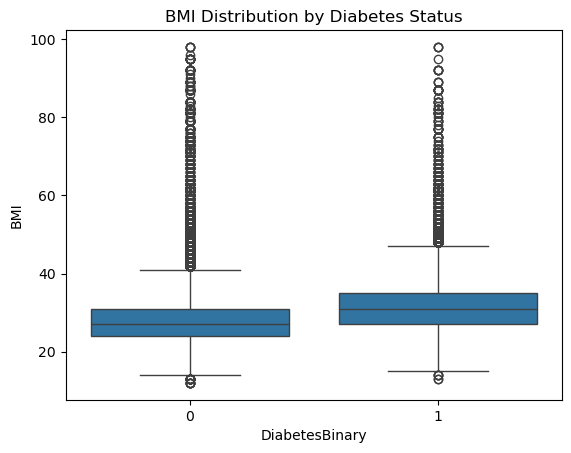

In [10]:
sns.boxplot(x="DiabetesBinary", y="BMI", data=df)
plt.title("BMI Distribution by Diabetes Status")
plt.show()

This boxplot compares the distribution of BMI between individuals with and without diabetes (0=no diabetes,1=diabetes). Individuals classified as having diabetes show a higher median BMI and a wider distribution compared to those without diabetes. This suggests that increased BMI is strongly associated with diabetes status, supporting obesity as a major modifiable risk factor for diabetes at the population level.

### Physical Activity vs Diabetes

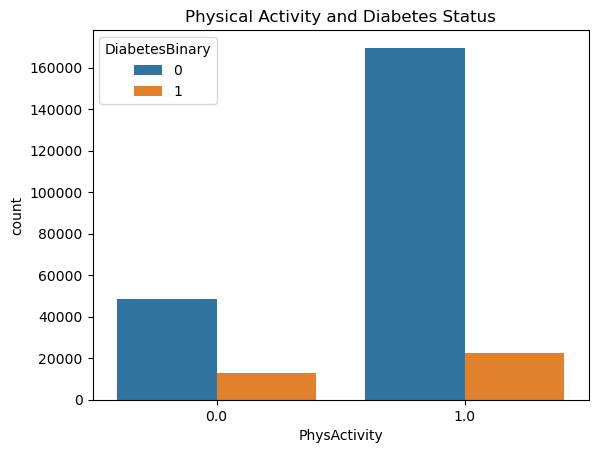

In [11]:
sns.countplot(x="PhysActivity", hue="DiabetesBinary", data=df)
plt.title("Physical Activity and Diabetes Status")
plt.show()

This graph shows the relationship between physical activity and diabetes status. Each bar represents the number of people who are physically active or not, and the different colors show whether they have diabetes or not. The graph indicates that people who are physically active are less likely to have diabetes, while diabetes is more common among people who do not engage in physical activity.The height of each bar = how many people fall into that group

Example:

Orange bars are small → fewer people with diabetes in that group

Blue bars are large → more people without diabetes

### High Blood Pressure vs diabetes

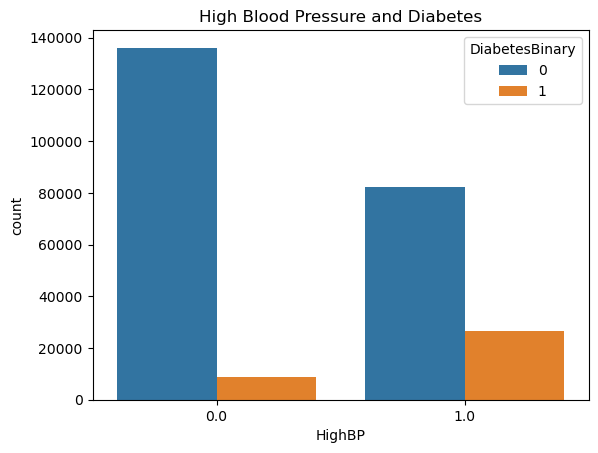

In [13]:

sns.countplot(x="HighBP", hue="DiabetesBinary", data=df)
plt.title("High Blood Pressure and Diabetes")
plt.show()


This graph shows the relationship between high blood pressure  and diabetes. Each bar represents the number of people with and without high blood pressure, and the colors show whether they have diabetes or not.

The taller bars (blue) represent people without diabetes

The smaller bars (orange) represent people with diabetes

this means that:

People with high blood pressure are more likely to have diabetes compared to people without high blood pressure. This suggests that high blood pressure is a risk factor for diabetes.

## Goal:
Now our main goal is to predict whether a person has diabetes or not based on their health and lifestyle factors.

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


preparing

In [16]:
X = df[["BMI","HighBP","HighChol","PhysActivity","Smoker","Age","Sex","Education","Income"]]
    
y = df["DiabetesBinary"]


lets train and split the data

In [17]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)
    

Applying decission tree classifier

In [19]:
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


### Time for prediction

In [20]:
y_pred = model.predict(X_test)


LETS CHECK ACCURACY OF OUR MODEL

In [21]:
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)



Model Accuracy: 0.8620900346893724


I used decission tree classifier to predict the diabetes status based on health and lifestyle factors. Decision trees are simple models that split the data into groups to estimate the risk of diabetes. My model has an accuracy of 86% . This shows which factors are most important in predicting diabetes risk.